# Tyler Cady 
## APPM 5570 
## 12/18/2017

# APPM 4570/5570 Fall 2017 Project

Instructions: Answer each part of the following questions. You are permitted to collaborate with classmates, but you should ${\bf not}$ copy code or answers from anyone. All work should be your own (perhaps influenced by collaborations). Some questions might require some outside research. I am here to help!

Note that some questions require you to write out explanations and equations. I ${\bf \text{do not}}$ want these parts written by hand and turned in separately. Part of the goal of this project is for you to learn to write (very basic) LaTeX equations in the Markdown cells here in Jupyter. Please see the following link for a tutorial: http://data-blog.udacity.com/posts/2016/10/latex-primer/.

This project will be submitted electronically to a Google Drive folder. I will provide you with a link to the submissions folder as we get closer to the ${\bf \text{Wednesday, December 20th due date.}}$

# Question #1

In this question, we will explore a method for fitting a regression model where the predictor variable is partitioned into intervals, and on each interval, a different linear relationship exists between the predictor and response. We are interested in fitting separate line segments to each interval such that the overall model is a continuous function.



(a) Load the ${\tt plant}$ dataset into R. Plot measurements of the plant organ, $y$, as a function of time, ${\tt time}$, using colors to differentiate attributes of the plant organ, ${\tt group}$.  


In [20]:
plant <- read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/plant.txt", 
                    header = TRUE, sep = "\t");
str(plant);
summary(plant);

'data.frame':	103 obs. of  3 variables:
 $ y    : num  0.12 0.12 0.11 0.19 0.27 0.28 0.35 0.38 0.46 0.51 ...
 $ time : num  142 142 142 183 213 ...
 $ group: Factor w/ 3 levels "RKV","RKW","RWC": 2 2 2 2 2 2 2 2 2 2 ...


       y               time       group   
 Min.   :0.1100   Min.   :141.6   RKV:32  
 1st Qu.:0.5850   1st Qu.:297.4   RKW:37  
 Median :0.8200   Median :419.5   RWC:34  
 Mean   :0.7287   Mean   :433.9           
 3rd Qu.:0.8850   3rd Qu.:588.0           
 Max.   :1.0200   Max.   :750.2           

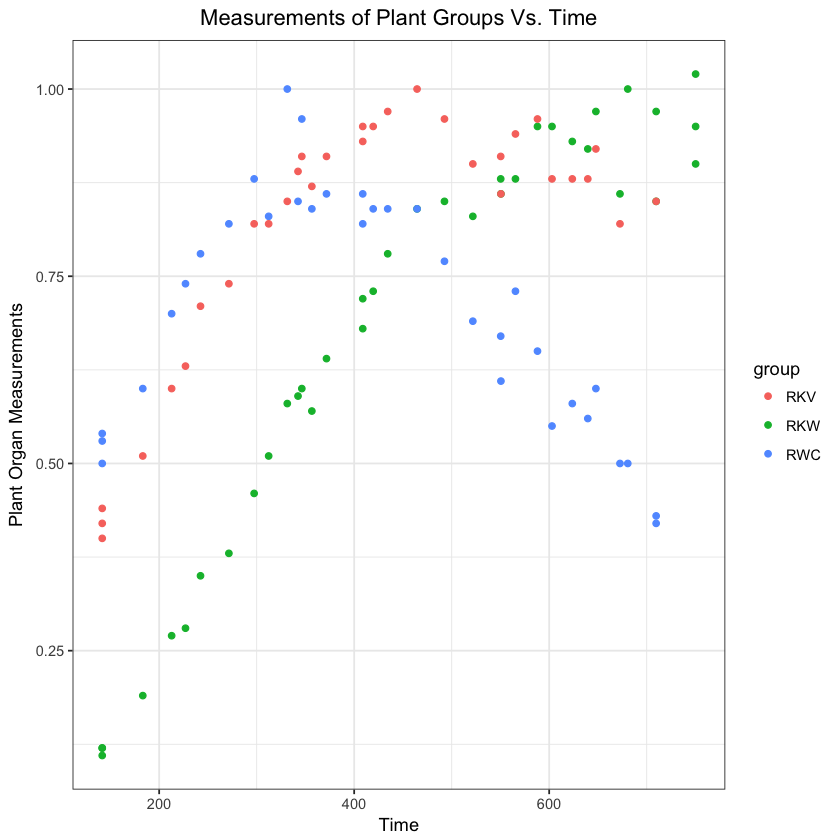

In [81]:
library(ggplot2);
plot1 <- ggplot(plant, aes(time, y, color=group)) + 
            geom_point() + 
            labs(title="Measurements of Plant Groups Vs. Time", x="Time", y="Plant Organ Measurements") +
            theme_bw() +
            theme(plot.title = element_text(hjust = 0.5));
plot1;

(b) Notice that, conditioned on RKV, the time variable seems to be partitioned into two groups: a group where time is less than 400, and a group where time is greater than 400. We will fit the following model:

$$Y_i = \beta_0 + \beta_1f_1(X_i) + \beta_2f_2(X_i) + \varepsilon_i, \,\,\, i = 1,...,n, \,\,\,\,\,\, (1) $$

where:

1. $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$;

2. $
f_1(X) = 
\begin{cases}
400 - X \,\,\, \text{ if }  \,\,\, X \le 400 \\
0 \,\,\, \text{otherwise}
\end{cases};
$

3. $
f_2(X) = 
\begin{cases}
 X - 400 \,\,\, \text{ if }  \,\,\, X \ge 400 \\
0 \,\,\, \text{otherwise}
\end{cases};
$

4. $X$ is the time variable for group RKV; and

5. $Y$ is the measurement variable for group RKV.

This model fits separate lines to the data before and after the "change point" of $400$. Write R code for the functions $f_1(x)$ and $f_2(x)$. 

In [6]:
# Function for the left hand side
LHS <- function(x) ifelse(x <= 400, 400-x, 0);
# Function for the right hand side
RHS <- function(x) ifelse(x >= 400, x-400, 0);

(c) Using the model in (1), write down the equation of the line that is fit to the data to the left of the change point. Write down the equation of the line that is fit to the data to the right of the change point. Justify your answer.

Model for the LHS: $y_i=\beta_0 + \beta_1*(400 - x_i)$ <br>
Model for the RHS: $y_i=\beta_0 + \beta_2*(x_i - 400)$ <br>
The lines for the LHS and the RHS will have different slope coefficients because they repesent different lines. Forcing the two lines to be continuous at the point time=400 spares us from having a fourth coefficient estimate.  We defined the model such that when the time is less than or equal to 400, the model only takes into account those data points, and the same goes for when time is greater than or equal to 400.  This is why we observe two different model coefficients $\beta_1$ and $\beta_2$ for the LHS and RHS repectively. 

(d) Fit the model in (1) in R, and print a summary. Should you exclude any of the (transformed) predictors from the model? Would a model with just an intercept be sufficient? Explain why or why not?

In [7]:
library(dplyr);
# Subset the data
plantRKV <- filter(.data=plant, group=="RKV");
# Build the model
BsMod <- lm(y ~ LHS(time) + RHS(time), data = plantRKV);
summary(BsMod);


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Call:
lm(formula = y ~ LHS(time) + RHS(time), data = plantRKV)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.059054 -0.024047 -0.000161  0.023438  0.057910 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  9.871e-01  1.122e-02  87.981  < 2e-16 ***
LHS(time)   -2.104e-03  8.065e-05 -26.090  < 2e-16 ***
RHS(time)   -4.524e-04  7.109e-05  -6.364  5.9e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.03307 on 29 degrees of freedom
Multiple R-squared:  0.9646,	Adjusted R-squared:  0.9622 
F-statistic: 395.1 on 2 and 29 DF,  p-value: < 2.2e-16


The p-values for all of the coefficient estimates are less than the $\alpha$=0.05 level, thus indicating that they are statistically significant.  This means that we should NOT exclude any of the transformed predictors from the model. The p-value for the F-test is also less than the $\alpha$=0.05 level, thus the full model is prefered to the null model. 

(e) Plot the model over the scatterplot of the data. Comment on the fit.

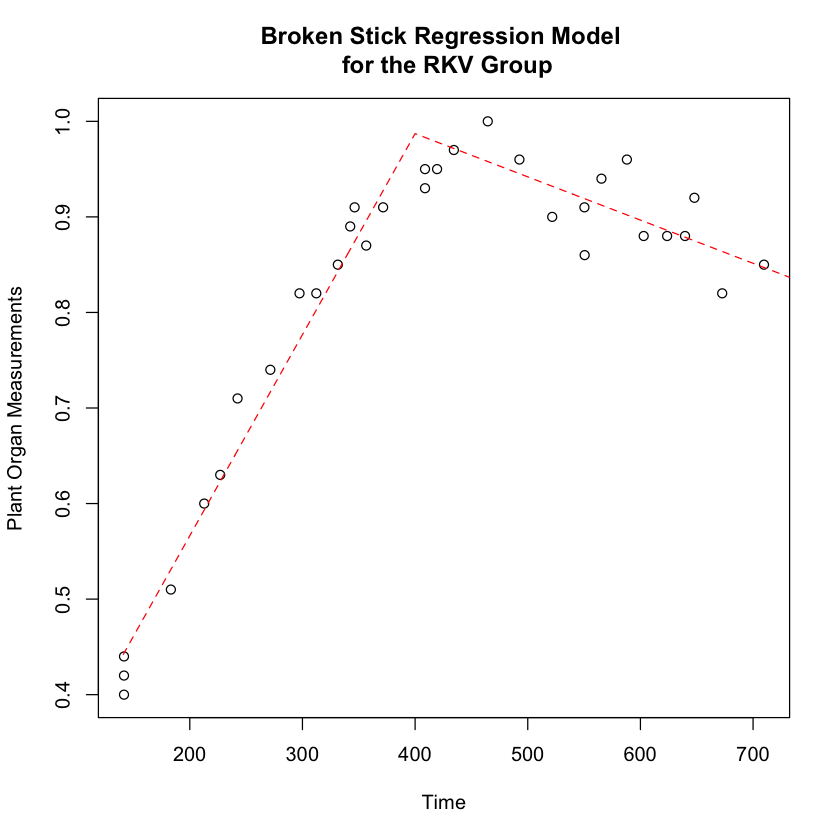

In [11]:
# Construct the best fit line for the plot
x <- seq(from=141, to=751, by=1);
l <- BsMod$coef[1]+BsMod$coef[2]*LHS(x)+BsMod$coef[3]*RHS(x);
# Generate the plot
plot(y ~ time, data=plantRKV, main="Broken Stick Regression Model \n for the RKV Group", 
     xlab="Time", ylab="Plant Organ Measurements");
lines(x, l, lty=2, col="red");

The broken stick regression model fits the data really well; capturing the two different group slopes with respect to the break point time = 400. The point time = 400 does seem a little forced, as evidenced by the lines connected above where the data lay. A more smooth curve connecting the two points about the point time=400 may be a better model for the data. 

(f) Plot the residuals against the fitted values. Comment on this plot. 

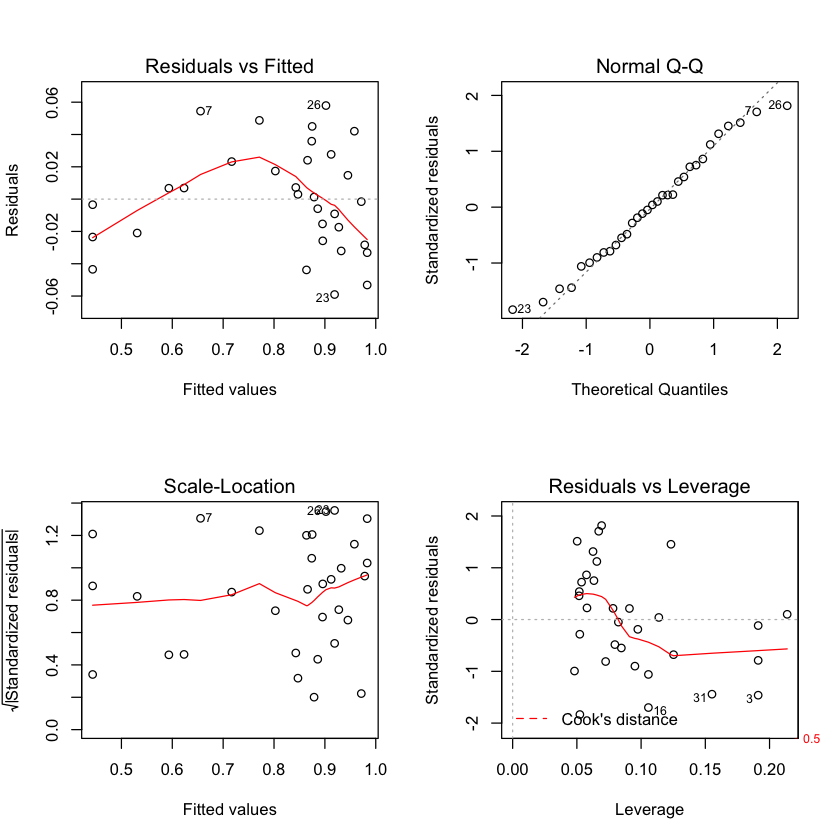

In [80]:
par(mfrow=c(2,2));
plot(BsMod);

We would like to see a random cloud of residual Vs. fitted values, but that is not the case here. There is definitely structure in this plot. This may mean that the underlying relationship between the response and predictor is not linear. The plot suggests that opposed to a broken stick model; in which we fit two linear models with respect to the point time=400, it may be useful to use polynomial regression, possibly of degree two. 

# Question #2

(a) Load the diabetes dataset (for information about this data set, see https://www.rdocumentation.org/packages/faraway/versions/1.0.7/topics/diabetes). Report summary statistics. Does it appear that the data need to be cleaned? If so, clean the data.


In [22]:
# Import dplyr
library(dplyr);
# Load the dataset into the workspace
diabetes <- read.csv("/Users/Tyler/Documents/diabetes.csv", header = TRUE);
# Report the summary statistics
summary(diabetes);
str(diabetes);

       X               id             chol          stab.glu    
 Min.   :  1.0   Min.   : 1000   Min.   : 78.0   Min.   : 48.0  
 1st Qu.:101.5   1st Qu.: 4792   1st Qu.:179.0   1st Qu.: 81.0  
 Median :202.0   Median :15766   Median :204.0   Median : 89.0  
 Mean   :202.0   Mean   :15978   Mean   :207.8   Mean   :106.7  
 3rd Qu.:302.5   3rd Qu.:20336   3rd Qu.:230.0   3rd Qu.:106.0  
 Max.   :403.0   Max.   :41756   Max.   :443.0   Max.   :385.0  
                                 NA's   :1                      
      hdl             ratio            glyhb             location  
 Min.   : 12.00   Min.   : 1.500   Min.   : 2.68   Buckingham:200  
 1st Qu.: 38.00   1st Qu.: 3.200   1st Qu.: 4.38   Louisa    :203  
 Median : 46.00   Median : 4.200   Median : 4.84                   
 Mean   : 50.45   Mean   : 4.522   Mean   : 5.59                   
 3rd Qu.: 59.00   3rd Qu.: 5.400   3rd Qu.: 5.60                   
 Max.   :120.00   Max.   :19.300   Max.   :16.11                   
 NA'

'data.frame':	403 obs. of  20 variables:
 $ X       : int  1 2 3 4 5 6 7 8 9 10 ...
 $ id      : int  1000 1001 1002 1003 1005 1008 1011 1015 1016 1022 ...
 $ chol    : int  203 165 228 78 249 248 195 227 177 263 ...
 $ stab.glu: int  82 97 92 93 90 94 92 75 87 89 ...
 $ hdl     : int  56 24 37 12 28 69 41 44 49 40 ...
 $ ratio   : num  3.6 6.9 6.2 6.5 8.9 ...
 $ glyhb   : num  4.31 4.44 4.64 4.63 7.72 ...
 $ location: Factor w/ 2 levels "Buckingham","Louisa": 1 1 1 1 1 1 1 1 1 1 ...
 $ age     : int  46 29 58 67 64 34 30 37 45 55 ...
 $ gender  : Factor w/ 2 levels "female","male": 1 1 1 2 2 2 2 2 2 1 ...
 $ height  : int  62 64 61 67 68 71 69 59 69 63 ...
 $ weight  : int  121 218 256 119 183 190 191 170 166 202 ...
 $ frame   : Factor w/ 3 levels "large","medium",..: 2 1 1 1 2 1 2 2 1 3 ...
 $ bp.1s   : int  118 112 190 110 138 132 161 NA 160 108 ...
 $ bp.1d   : int  59 68 92 50 80 86 112 NA 80 72 ...
 $ bp.2s   : int  NA NA 185 NA NA NA 161 NA 128 NA ...
 $ bp.2d   : int  NA NA 92

Yes, we should clean the data. There appear to be several variables with NA values. First, I will remove the variables that are not relevant to the analysis for this problem, then I will remove the rows that contain NA values in the data frame. 

In [26]:
# Create a new data frame with only the relevant variables
d <- select(.data=diabetes, stab.glu, gender, frame);
str(d);
summary(d);
# There are 12 NA values in the frame column, remove those observations
d <- na.omit(d);

'data.frame':	403 obs. of  3 variables:
 $ stab.glu: int  82 97 92 93 90 94 92 75 87 89 ...
 $ gender  : Factor w/ 2 levels "female","male": 1 1 1 2 2 2 2 2 2 1 ...
 $ frame   : Factor w/ 3 levels "large","medium",..: 2 1 1 1 2 1 2 2 1 3 ...


    stab.glu        gender       frame    
 Min.   : 48.0   female:234   large :103  
 1st Qu.: 81.0   male  :169   medium:184  
 Median : 89.0                small :104  
 Mean   :106.7                NA's  : 12  
 3rd Qu.:106.0                            
 Max.   :385.0                            

(b) Print a boxplot of the stabalized glucose, conditioning on gender. Comment on each distribution. Visually, do you see a difference between the mean stabalized glucose among males and the mean stabalized glucose among females?

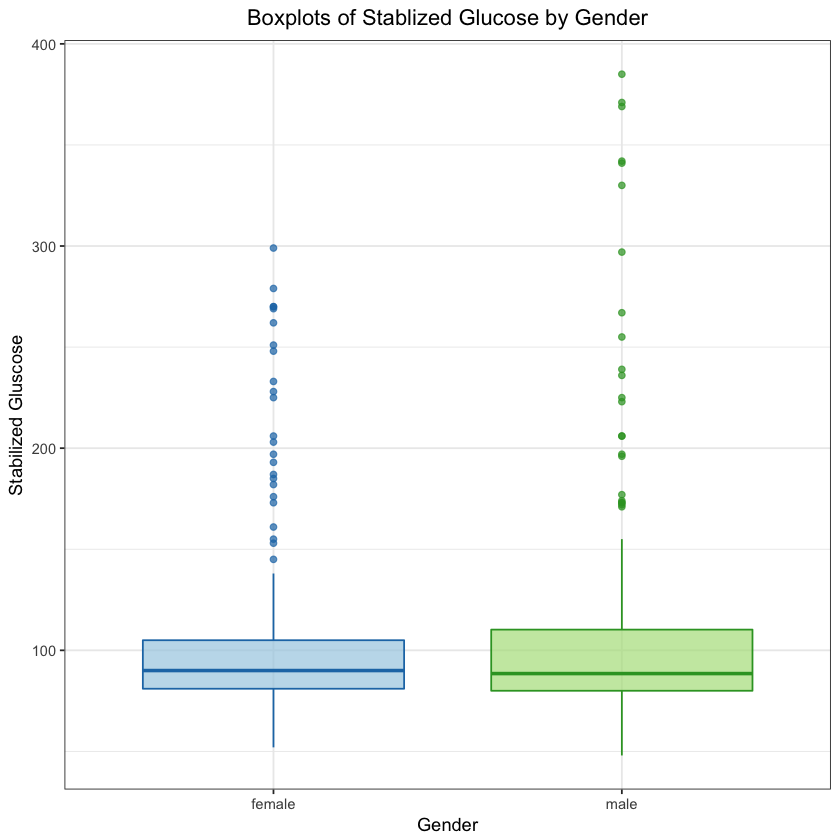

In [48]:
library(RColorBrewer);
col <- brewer.pal(8,"Paired");
fill <- col[c(1,3)];
line <- col[c(2,4)];

gbox <- ggplot(data=d, aes(y=stab.glu, x=gender)) +
        geom_boxplot(fill=fill, color=line, alpha=0.7) +
        labs(title="Boxplots of Stablized Glucose by Gender", x="Gender",y="Stabilized Gluscose") +
        theme_bw() +
        theme(plot.title = element_text(hjust=0.5));
gbox;

There does not appear to be a a difference in the two means across the different groups. 

(c) Formally test the hypothesis that there is no difference in mean stable glucose across males and females. Report the p-value and what hypothesis you would act as though is true.

In [40]:
t.test(filter(.data = d, gender == "male")$stab.glu, filter(.data = d, gender == "female")$stab.glu);


	Welch Two Sample t-test

data:  filter(.data = d, gender == "male")$stab.glu and filter(.data = d, gender == "female")$stab.glu
t = 1.5712, df = 270.59, p-value = 0.1173
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -2.294434 20.429440
sample estimates:
mean of x mean of y 
 111.7988  102.7313 


With an $\alpha$=0.05 significance level, we fail to reject the null hypothesis; that there is no difference in the means of the two groups. That is, we continue with our analyses with the conclusion that there is not statistical evidence to disuade us from believing that the means of the two groups are the same. 

(d) Is the confidence interval for the difference in means consistent with the result of the test? Explain.

Yes, the 95% confidence interval is consistent with the hypothesis test. The value 0 is contained in the 95% confidence interval, meaning that it is not unusual to observe the true difference in means to equal 0. In English, this means that it wouldn't be weird to see the average values for the two groups be the same. 

(e) Now, construct a boxplot of stable gluecose, conditioning on frame. Comment on each distribution. Visually, do you see a difference between the mean stabalized glucose among people of different frame sizes?

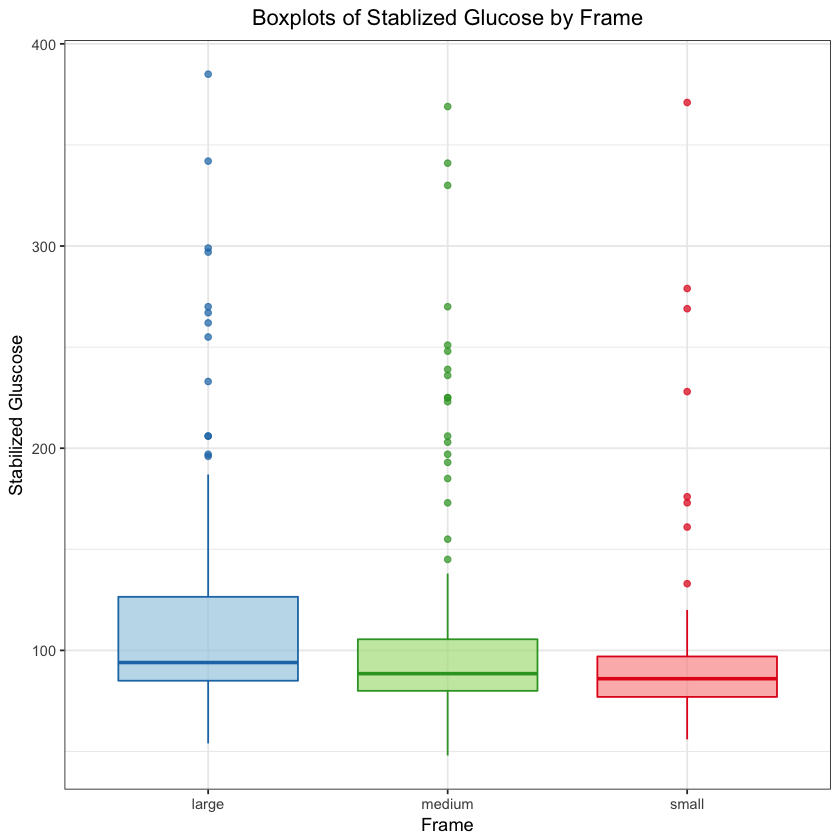

In [49]:
library(RColorBrewer);
col <- brewer.pal(8,"Paired");
fill <- col[c(1,3,5)];
line <- col[c(2,4,6)];

fbox <- ggplot(data=d, aes(y=stab.glu, x=frame)) +
        geom_boxplot(fill=fill, color=line, alpha=0.7) +
        labs(title="Boxplots of Stablized Glucose by Frame", x="Frame",y="Stabilized Gluscose") +
        theme_bw() +
        theme(plot.title = element_text(hjust=0.5));
fbox;

The quartiles for the three distributions see increases from small frame to medium frame and again from medium frame to large frame. Visually, it appears that there are slight differences in the median values across the different frame sizes. The mediun framed group has the most amount of outliers, followed by the large framed group, and the small framed group has the least amount of outliers. It is difficult to visualize the mean value of these groups because that information is not explicitly given in a boxplot. Since these groups all of outliers in the positive direction, it can be said that the mean will be higher than the median, with that in mind, I'd guess that it looks likely that there is a difference across the three means. 

(f) Let's now conduct an analysis to more formally decide whether there is difference among means of stable gluecose across people of different frame sizes (the technique that we will use is called Analysis of Variance (ANOVA)). We fit a linear model 

\begin{equation}
Y_i = \beta_0 + \beta_1X_{i,m} + \beta_2X_{i,s} + \varepsilon_i, \,\,\, i = 1,...,n \,\,\,\,\,\,\,\ (1)
\end{equation}

where

1. $\varepsilon_i \sim \mathcal{N}(0, \sigma^2)$;

2. $
 X_{i,m}= 
\begin{cases}
1 \,\,\, \text{ if the } i^{th} \text{ measurement is in the "medium" group.} \\
0 \,\,\, \text{otherwise}
\end{cases};
$

3. $
 X_{i,s}= 
\begin{cases}
1 \,\,\, \text{ if the } i^{th} \text{ measurement is in the "small" group.} \\
0 \,\,\, \text{otherwise}
\end{cases};
$
and
4. $Y_i$ is the $i^{th}$ measurement of stable glucose.

 
(i) Write down the model for stable glucose for individuals in the large framed group.

The model for the large framed group is just the baseline case, which in this instance is just the intercept term plus random noise: <br>
$Y_i=\beta_0+\epsilon_i$, $i=1,\dots,n$

(ii) Fit the model in equation (1) above. [HINT: The easiest way to do this is something like ${\tt lm(response \sim predictor, data = data)}$, where the predictor is the categorical variable in the dataset.] Is there a statistically significant difference among means of stable glucose across people of different frame sizes?

In [57]:
dlmod <- lm(stab.glu ~ frame, data = d);
(anova(dlmod));

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
frame,2,34693.5,17346.750,6.279766,0.002069869
Residuals,388,1071781.8,2762.324,NA,NA


At a significance level $\alpha=0.05$, we observe a p-value of $0.002$ for the ANOVA test, thus we reject the null hypothesis, that the difference in means across the three groups is zero, in favor of the alternative hypothesis, that the difference in the means between the three groups is other than zero. We conclude that the means of the three groups statistically differ from one another. 

(iii) What is the mean stable glucose value for a person with a large frame? Medium frame? How much higher or lower is the stable glucose of a small framed person than a large framed person?

In [65]:
summary(dlmod);


Call:
lm(formula = stab.glu ~ frame, data = d)

Residuals:
    Min      1Q  Median      3Q     Max 
-67.204 -26.632 -15.204   1.529 275.029 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  121.204      5.179  23.404  < 2e-16 ***
framemedium  -16.910      6.468  -2.615 0.009282 ** 
framesmall   -25.233      7.306  -3.454 0.000614 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 52.56 on 388 degrees of freedom
Multiple R-squared:  0.03135,	Adjusted R-squared:  0.02636 
F-statistic:  6.28 on 2 and 388 DF,  p-value: 0.00207


The mean stable glucose value for a people with the various frames are: <br>
Large frame: 121.204 <br>
Medium frame: 104.294 <br>
Small frame: 95.971 <br>
On average, the stable glucose of a small framed person is 25.233 units lower than the stable glucose of a large framed person. 

# Question #3 (APPM 5570 Only)

So far, in class, we've worked with response variables (dependent variables) that are continuous. In this example, we will work on "logistic regression", which allows us to model a categorical response.

(a) Read in the binary data from https://stats.idre.ucla.edu/stat/data/binary.csv. 

The dataset contains several columns which we can use as predictor variables:

gpa

gre score

rank or prestige of an applicant's undergraduate alma mater

The fourth column, admit, is our binary target variable. It indicates whether or not a candidate was admitted our not.


Store rank and admit as categorical variables/factors. Print a summary of the data. Note anything interesting.

In [66]:
binary <- read.csv("/Users/Tyler/Downloads/binary.csv", header = TRUE);
binary$admit <- as.factor(binary$admit);
binary$rank <- as.factor(binary$rank);
summary(binary);

 admit        gre             gpa        rank   
 0:273   Min.   :220.0   Min.   :2.260   1: 61  
 1:127   1st Qu.:520.0   1st Qu.:3.130   2:151  
         Median :580.0   Median :3.395   3:121  
         Mean   :587.7   Mean   :3.390   4: 67  
         3rd Qu.:660.0   3rd Qu.:3.670          
         Max.   :800.0   Max.   :4.000          

There are a few interesting takeaways from the summary statistics. More than twice as many applicants get rejected than accepted. The minimum gre and gpa seem to be extraordinarily low for a competitive school. There is a relatively symmetric distribution of students applying from the various ranked schools. 

(b) When analyzing a statistical model, it is often useful to use some of the data to train the model and some of the data to test whether the model can make good predictions. Use the sample function to extract 20% of the data as a test set. Store the training data in a data frame called df_train, and the test data in a data frame called df_test.

In [67]:
r <- nrow(binary);
m <- 0.8 * nrow(binary);
set.seed(1);
df_train_rows <- sample(1:r, size = m);
df_train <- binary[df_train_rows,];
df_test <- binary[-df_train_rows,];
# Sanity Check
# The Proportions should be 0.8 and 0.2 respectively
print(paste("The proportion of the original data in the training set is: ",nrow(df_train)/r));
print(paste("The proportion of the original data in the test set is: ",nrow(df_test)/r));

[1] "The proportion of the original data in the training set is:  0.8"
[1] "The proportion of the original data in the test set is:  0.2"


(c) Using the training data frame, and considering admit as the response with gre and gpa as predictors, run a logistic regression. Logistic regression in R can be run using the function glm(). For the family argument in glm(), use binomial. This specifies the mean model

$$ p = \frac{e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}{1 + e^{\beta_0 + \beta_1X_1 + \beta_2X_2}}, $$

where $p$ is the probability of admittance. 
Report the summary of the logistic regression model. Interpret the coefficient associated with gpa.

In [68]:
glmod <- glm(admit ~ gre + gpa, data = df_train, family = "binomial");
summary(glmod);


Call:
glm(formula = admit ~ gre + gpa, family = "binomial", data = df_train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1607  -0.8593  -0.7081   1.3368   1.9985  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept) -3.901729   1.180051  -3.306 0.000945 ***
gre          0.003254   0.001223   2.660 0.007806 ** 
gpa          0.314703   0.351765   0.895 0.370979    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 385.73  on 319  degrees of freedom
Residual deviance: 374.31  on 317  degrees of freedom
AIC: 380.31

Number of Fisher Scoring iterations: 4


The gpa coefficient can be interpreted as the rate of change in the log-odds for a one unit increase in gpa, given eventhing else is held constant. Holding everything else constant, a one unit increase in gpa increases the log-odds of admittance by 0.314703.

(d) Use the model to predict whether the people in the test set were admited to graduate school or not. Then, calculate the accuracy of these predictions. What percent of predictions are correct?

In [70]:
# Make the predictions on the test set
glm.prob <- predict.glm(glmod, newdata = df_test, type = "response");
# Sanity check
glm.prob[1:10];

# Using a threshold of 0.5 make the classifications based on the probability outputs from the model
preds <- as.matrix(rep("0", nrow(df_test)));
preds[glm.prob > 0.5,] <- "1";

# Determine the accuracy metric
acc <- sum(df_test$admit == preds)/length(preds);
print(paste("The accuracy of the model is: ",acc,"%","...which is not too great"));

1         2         3         5         8        12        14        20 
0.1781417 0.3545998 0.4901472 0.2162977 0.1637354 0.1890094 0.3420031 0.2798214 
       24        26 
0.3351795 0.4634615

[1] "The accuracy of the model is:  0.575 % ...which is not too great"


# Question #4

You have just been hired by a leading cereal company as chief statistician!  You feel ready for the challenge, since you studied so hard in your statistical methods class.  The company wants to make a healthy cereal that will also sell well, and your goal as the statistician is to determine which cereal variables lead to better FDA "health rankings".


To assess this, you are given a data set that contains 77 different cereals (this is found in the "cereals.txt" file).  For each cereal, these measurements (per 2 cups of cereal) are provided:

mfr: Cereal manufacturer (G: General Mills, K: Kellogs, N: Nabisco, O: Other) 

calories: Calories per serving

protein: 	Grams of protein per serving

fat: 	Grams of fat  per serving

sodium: 	Mg of sodium  per serving

fiber: Grams of dietary fiber per serving

carbo: Grams of complex carbohydrates per serving

sugars: Grams of sugar per serving

potass: Mg of potassium per serving

vitamins: Percentage of total daily vitamins and minerals recommended by the FDA

shelf: Display shelf of the cereal (levels range from 1 to 3, counting up from the floor)

rating: Rating of the cereal by the FDA.


Keep in mind that the head of the cereal company struggles with interpreting linear model output, and wants answers in terms of things that are easily read and understood.  Therefore, when analyzing your models, be sure your answers are friendly for a general audience, but include enough technical information that your statistics professor believes you know what you're talking about.    

Using R, perform the following steps and analyses:



(a) Make a histogram of your outcome/response, which is "rating", and compare it to a histogram of "log(rating)".  Which one looks more suitable for a linear model?  Transform your data appropriately.  (HINT: You need to log-transform your outcome before going any further!)

In [1]:
# Read in the data 
cereal <- read.table("https://www.colorado.edu/amath/sites/default/files/attached-files/cerealdata_1.txt", 
                     header = TRUE, sep = " ");
str(cereal);
# There are some NA values, remove them before the analysis
cereal <- na.omit(cereal);
cereal$shelf <- as.factor(cereal$shelf);

summary(cereal);

'data.frame':	77 obs. of  12 variables:
 $ mfr     : Factor w/ 4 levels "G","K","N","O": 3 4 2 2 4 1 2 1 4 4 ...
 $ calories: int  140 240 140 100 220 220 220 260 180 180 ...
 $ protein : num  5.33 4 5.33 5.33 2.67 ...
 $ fat     : num  1.33 6.67 1.33 0 2.67 ...
 $ sodium  : int  130 15 260 140 200 180 125 210 200 210 ...
 $ fiber   : num  13.33 2.67 12 18.67 1.33 ...
 $ carbo   : num  7.46 11.94 10.45 11.94 20.9 ...
 $ sugars  : num  8.96 11.94 7.46 0 11.94 ...
 $ potass  : num  373 180 427 440 NA ...
 $ vitamins: int  20 0 20 20 20 20 20 20 20 20 ...
 $ shelf   : int  3 3 3 3 3 1 2 3 1 3 ...
 $ rating  : num  68.4 34 59.4 93.7 34.4 ...


 mfr       calories        protein           fat            sodium     
 G:22   Min.   :100.0   Min.   :1.333   Min.   :0.000   Min.   :  0.0  
 K:23   1st Qu.:200.0   1st Qu.:2.667   1st Qu.:0.000   1st Qu.:135.0  
 N: 5   Median :220.0   Median :3.333   Median :1.333   Median :180.0  
 O:24   Mean   :214.1   Mean   :3.351   Mean   :1.333   Mean   :162.4  
        3rd Qu.:220.0   3rd Qu.:4.000   3rd Qu.:1.333   3rd Qu.:217.5  
        Max.   :320.0   Max.   :8.000   Max.   :6.667   Max.   :320.0  
     fiber             carbo            sugars           potass     
 Min.   : 0.0000   Min.   : 7.463   Min.   : 0.000   Min.   : 20.0  
 1st Qu.: 0.3333   1st Qu.:17.910   1st Qu.: 4.478   1st Qu.: 55.0  
 Median : 2.6667   Median :21.642   Median :10.448   Median :120.0  
 Mean   : 2.9009   Mean   :21.985   Mean   :10.609   Mean   :131.4  
 3rd Qu.: 4.0000   3rd Qu.:25.373   3rd Qu.:16.418   3rd Qu.:160.0  
 Max.   :18.6667   Max.   :34.328   Max.   :22.388   Max.   :440.0  
    vitamins 

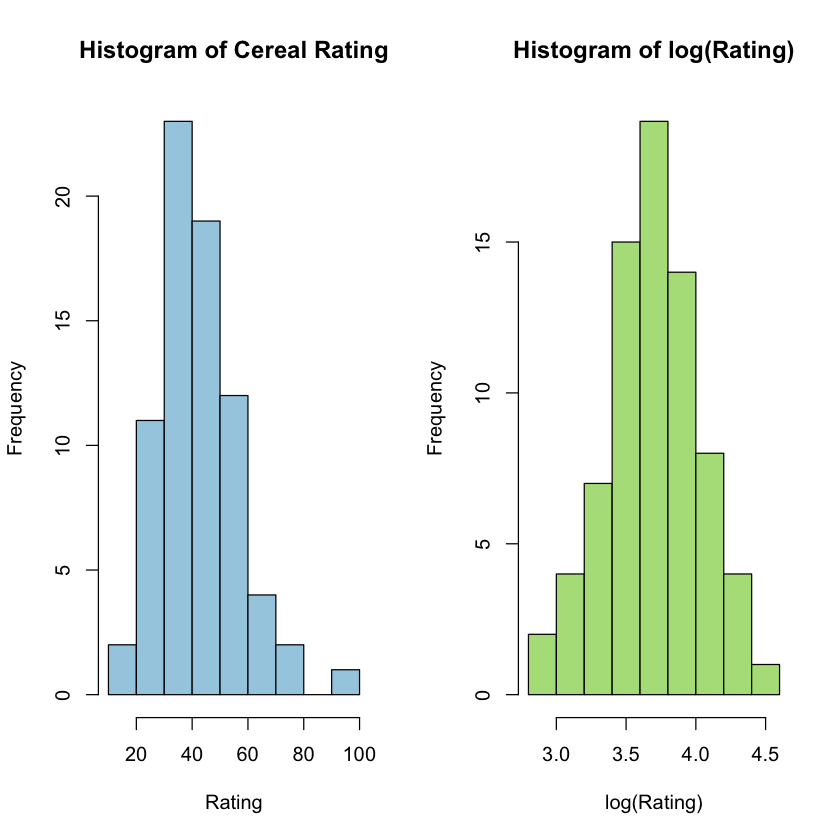

In [93]:
par(mfrow=c(1,2));
hist(cereal$rating, main = "Histogram of Cereal Rating", xlab="Rating", col=col[1]);
hist(log(cereal$rating), main = "Histogram of log(Rating)", xlab="log(Rating)", col=col[3]);

The log rating looks more normally distributed and has less skew. We should go forward using log(Rating).

(b) Make a scatterplot to examine the different predictor variables.  Do any of them look correlated?

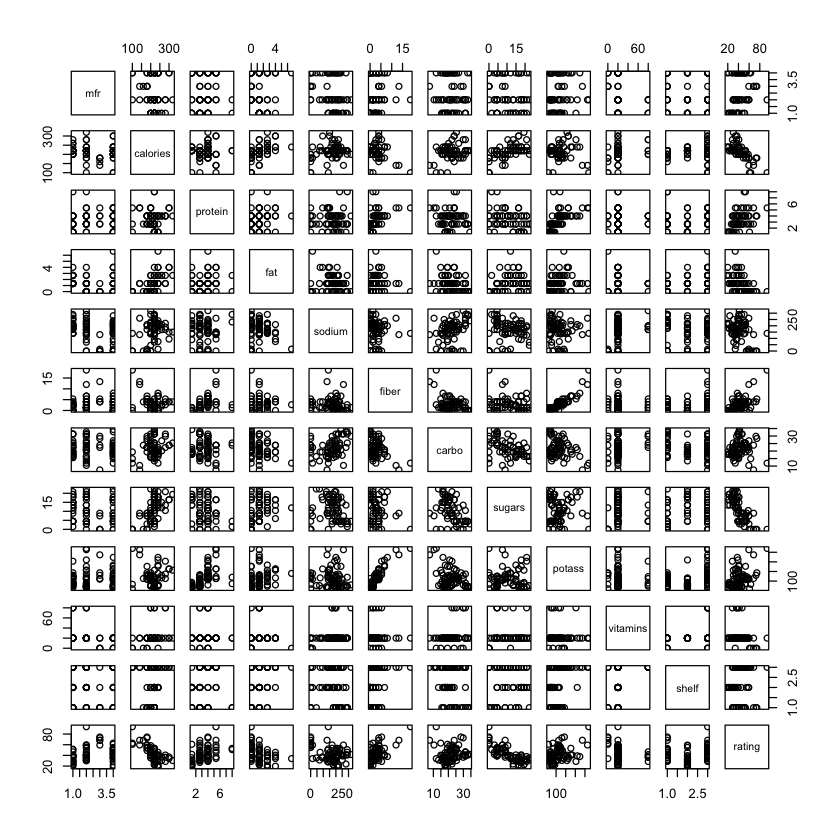

In [94]:
par(mfrow=c(1,1));
plot(cereal);

Yes, many of the variables appear to be correlated, as evidenced by the structure in the pairwise scatterplots. For example, fiber and potass appear to have a nearly perfect positive-linear relationship. 

(c) In matrix-vector notation, write out the full model for the first and last 5 observations (10 total) from the data.  (Here, the term "full" model refers to the model that includes all predictors/covariates.)  For variables that are factors, be sure to include a column in $X$ for each factor. 


In [12]:
# Look at the X matrix for the first and last 5 rows. 
rbind(head(model.matrix(clmod),5),tail(model.matrix(clmod)));

,(Intercept),mfrK,mfrN,mfrO,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf2,shelf3
1,1,0,1,0,140,5.333333,1.333333,130,13.333333,7.462687,8.955224,373.33333,20,0,1
2,1,0,0,1,240,4.000000,6.666667,15,2.666667,11.940299,11.940299,180.00000,0,0,1
3,1,1,0,0,140,5.333333,1.333333,260,12.000000,10.447761,7.462687,426.66667,20,0,1
4,1,1,0,0,100,5.333333,0.000000,140,18.666667,11.940299,0.000000,440.00000,20,0,1
6,1,0,0,0,220,2.666667,2.666667,180,2.000000,15.671642,14.925373,93.33333,20,0,0
72,1,0,0,0,200,4.000000,1.333333,200,4.000000,23.880597,4.477612,146.66667,80,0,1
73,1,0,0,0,220,2.666667,1.333333,250,0.000000,31.343284,4.477612,80.00000,20,0,1
74,1,0,0,0,220,1.333333,1.333333,140,0.000000,19.402985,17.910448,33.33333,20,1,0
75,1,0,0,1,200,4.000000,1.333333,230,4.000000,25.373134,4.477612,153.33333,20,0,0
76,1,0,0,0,200,4.000000,1.333333,200,4.000000,25.373134,4.477612,146.66667,20,0,0


The above matrix will be refered to as the data matrix X in the model formula. 

$log(\underline{Y}) = \textbf{X}\underline{\beta} + \underline{\epsilon}$

(d) Fit the full model using $\texttt{lm()}$ in R, and perform the following. Note that the answers below must take into account the log transform!

1. Write out your full estimated model.
2. What is the average rating for a General Mills cereal that sits on the bottom shelf and contains the minimum number (among the cereals in the data set) of: calories, protein, fat, sodium, fiber, carbohydrates, sugars, potassium, and vitamins?
3. Which predictor/covariate seems to have the biggest effect on rating with a 1-unit increase? (Look at the magnitude of the $\beta$ estimates.)  Interpret this predictor/covariate.
4. Does the manufacturer appear to have a statistically significant impact on the FDA rating?  Do you think this is appropriate?
5.  Does the shelf the cereal sits on appear to have a statistically significant impact on the FDA rating?  Do you think this is appropriate?


In [6]:
clmod <- lm(log(rating) ~ mfr + calories + protein + fat + sodium + fiber + carbo + sugars + potass + vitamins + shelf, 
           data = cereal);
summary(clmod);


Call:
lm(formula = log(rating) ~ mfr + calories + protein + fat + sodium + 
    fiber + carbo + sugars + potass + vitamins + shelf, data = cereal)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.195170 -0.030311  0.007845  0.035139  0.105600 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.8854422  0.0619283  62.741  < 2e-16 ***
mfrK         0.0300157  0.0230937   1.300  0.19875    
mfrN        -0.0184707  0.0456072  -0.405  0.68695    
mfrO         0.0203393  0.0202990   1.002  0.32044    
calories    -0.0034317  0.0007676  -4.470 3.60e-05 ***
protein      0.0791570  0.0086109   9.193 5.46e-13 ***
fat         -0.0227049  0.0126136  -1.800  0.07697 .  
sodium      -0.0012589  0.0001244 -10.121 1.64e-14 ***
fiber        0.0448763  0.0079505   5.644 4.99e-07 ***
carbo        0.0234373  0.0047053   4.981 5.84e-06 ***
sugars      -0.0048669  0.0045973  -1.059  0.29407    
potass      -0.0004301  0.0002648  -1.624  0.10961    
vitamins

### d.1

$log(rating) = 3.8854422+0.0300157*I(mfrK)-0.0184707*I(mfrN)+0.0203393*I(mfrO)-0.0034317*calories+0.0791570*protein-0.0227049*fat-0.0012589*sodium+0.0448763*fiber+0.0234373*carbo-0.0048669*sugars-0.0004301*potass-0.0014412*vitamins-0.0508353*I(shelf2)+0.0176423*I(shelf3)$

### d.2

In [109]:
paste("The average FDA rating for this cereal is: ",
      round(exp(sum(coef(clmod)*c(1,0,0,0,min(cereal$calories),
                                    min(cereal$protein),min(cereal$fat),min(cereal$sodium),min(cereal$fiber),
                                    min(cereal$carbo),min(cereal$sugars),min(cereal$potass),min(cereal$vitamins),
                                    0,0))),4));

[1] "The average FDA rating for this cereal is:  45.3365"

### d.3

The covariate that has the most significant impact on the FDA rating is protein. Given no other changes to the cereal (e.g. all other predictors are held constant), an increase of 1 gram of protein per serving will on average increase the FDA rating of the cereal by 1.0824 (this number was obtained by: $e^{\beta_{protein}}=e^{0.0791570}=1.082374241487$.

### d.4

At a significance level $\alpha=0.05$ the manufacturer does not appear to have a statistically significant impact on the FDA rating. In english, this means that the FDA rating probably doesn't depend on manufacturer. This makes sense as the different large cereal manufacturers (General Mills, Kellogs, and Nabisco) typically make both healthy and healthy cereals which would get "bad" and "good" FDA ratings respectively.  The category "other" lumps in different manufacturers, some of which make healthy cereal and some of which make unhealthy cereals, so it may even out, making the actual manufacturer unimportant. It doesn't matter who makes the cereal, it matters what that company puts in it. This is also good news because it shows that the FDA is probably rating companies fairly.    

### d.5

At a significance level of $\alpha=0.05$ it appears that the second shelf is a statistically significant predictor for modeling the log(rating). In english, this means that it is important to the FDA rating that the cereal is placed on the middle shelf. In actuality, this is probably due to the correlated variables. It should not matter to the FDA which shelf the cereal is placed on.  This could be accounted for by the middle shelf being the prime marketing placement for children since it is close to eye level.  These cereals may tend to have lower ratings by the FDA since they are designed to appeal to children and may be higher in sugar content. The shelf variable may be explaining some of that in the model. 

(e) Some of the predictors from the full model are not significant and are perhaps illogical in assessing FDA rankings.  Create a smaller model that only includes these variables: calories, protein, fat, sodium, fiber, carbohydrates, sugars, and vitamins.  Fit this model in R and perform the following. Note that the answers below must take into account the log transform!


1. Write out the estimated smaller model.
2. What is the average rating for a cereal that contains the minimum number (among the cereals in the data set) of: calories, protein, fat, sodium, fiber, carbohydrates, sugars, and vitamins?  How does this compare to your larger model?  Does this make sense?
3. How does the average rating change with a 1 gram increase in fat?
4. How does the average rating change with a 1 gram increase in protein?
5. What percent of the variation in ratings is explained by your model (i.e., what is $R^2$?)?  


In [116]:
clmod2 <- lm(log(rating) ~ calories + protein + fat + sodium + fiber + carbo + sugars + vitamins, data=cereal);
summary(clmod2);


Call:
lm(formula = log(rating) ~ calories + protein + fat + sodium + 
    fiber + carbo + sugars + vitamins, data = cereal)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.20316 -0.01410  0.01895  0.03840  0.09857 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.8699978  0.0583553  66.318  < 2e-16 ***
calories    -0.0028271  0.0007993  -3.537 0.000753 ***
protein      0.0753657  0.0083742   9.000 4.96e-13 ***
fat         -0.0334945  0.0124136  -2.698 0.008873 ** 
sodium      -0.0012402  0.0001061 -11.684  < 2e-16 ***
fiber        0.0365133  0.0033281  10.971  < 2e-16 ***
carbo        0.0203775  0.0048908   4.166 9.32e-05 ***
sugars      -0.0098356  0.0045570  -2.158 0.034600 *  
vitamins    -0.0011356  0.0004815  -2.359 0.021355 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.06646 on 65 degrees of freedom
Multiple R-squared:  0.9628,	Adjusted R-squared:  0.9582 
F-statistic: 210.3 on 

### e.1

$log(rating)=3.8545220-0.0046568*calories-0.0334945*fat+0.0824861*protein-0.0012529*sodium+0.0382126*fiber+0.0311628*carbo-0.0005311*sugars-0.0011390*vitamins$

### e.2

In [117]:
paste("The average FDA rating for this cereal is: ",
      round(sum(exp(coef(clmod2)*c(1,min(cereal$calories),min(cereal$fat),min(cereal$protein),
        min(cereal$sodium),min(cereal$fiber),min(cereal$carbo),min(cereal$sugars),min(cereal$vitamins)))),4));

[1] "The average FDA rating for this cereal is:  55.8166"

The average FDA rating for this smaller model is higher than the larger model. This makes sense because most of the noise from the unimportant ("statistically insignificant" for the statisticain) variables have been removed.   

### e.3

In [123]:
paste("The average FDA rating change associated with a 1 gram per serving increase in fat is: ",
      round(exp(-0.0334945),4));

[1] "The average FDA rating change associated with a 1 gram per serving increase in fat is:  0.9671"

### e.4

In [124]:
paste("The average FDA rating change associated with a 1 gram per serving increase in protein is: ",
      round(exp(0.0753657),4));

[1] "The average FDA rating change associated with a 1 gram per serving increase in protein is:  1.0783"

### e.5

The percent of the variation in ratings that is explained by the smaller model is given by the multiple $R^2$ value. $R^2=0.9582$. 

(f) Compare the models using a partial F test.  Which model do you think is better and why?


In [127]:
anova(clmod2, clmod);

Res.Df,RSS,Df,Sum of Sq,F,Pr(>F)
65,0.2871255,NA,NA,NA,NA
59,0.2203837,6,0.06674181,2.977963,0.01312379


According to the partial F-test, at a significance level $\alpha=0.05$ the full model is better than the reduced. That is, we fail to reject the null hypothesis, $H_0$: $\beta_{not-in-reduced-model}=0$.  However, I like the reduced model because it is easier to interpret.  The overall goal of this analysis was to understand which variables were important factors to the FDA ratings of the cereals. Therefore, interpretibility is much more important than a slight edge in the predictive power of the model. 

(g) Check that your model satisfies our modeling assumptions and discuss.

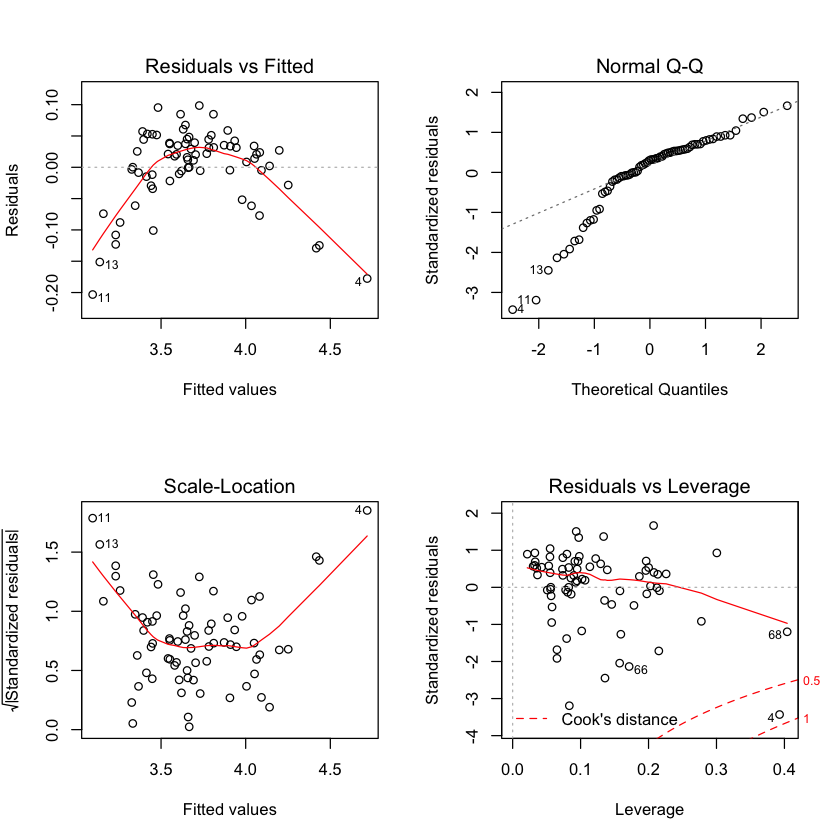

In [129]:
par(mfrow=c(2,2));
plot(clmod2);

The model doesn't satisfy the various assumptions for linear regression.  The underlying relationships aren't all linear, the residuals aren't entirely normally distributed, and many of our covariates have strong correlation (e.g. multicollinearity is a problem). We could improve our model if we took care of these issues by transforming predictors, using PCA, or various other techniques that we didn't go over in this course. 

# Question #5

Let $Y_i = \beta x_i + \epsilon_i$ be a linear regression model, with $\epsilon_i \sim \mathcal{N}(0, 5)$  (i.e., $\sigma^2$ is known).

(a) Find the equation for the least squares estimate, $\widehat{\beta}$, for $\beta$.


\begin{align}
\frac{\partial SSR}{\partial \beta} &= \frac{\partial}{\partial \beta}\sum\limits_{i=1}^n{(\epsilon_i)^2} \\
\frac{\partial SSR}{\partial \beta} &= \frac{\partial}{\partial \beta}\sum\limits_{i=1}^n{(Y_i - \beta x_i)^2} \\
\frac{\partial SSR}{\partial \beta} &= -2\sum\limits_{i=1}^n{(Y_i - \beta x_i)(x_i)} \\
\frac{\partial SSR}{\partial \beta} &= -2\sum\limits_{i=1}^n{Y_i x_i}+2\sum\limits_{i=1}^n{x_i^2} \\
\frac{\partial SSR}{\partial \beta} &\overset{set}= 0 \\
0 &= -2\sum\limits_{i=1}^n(Y_i - \hat{\beta}x_i)(x_i) \\
0 &= -2\sum\limits_{i=1}^n(Y_i x_i) + 2 \hat{\beta}\sum\limits_{i=1}^n(x_i^2) \\
\sum\limits_{i=1}^n(Y_i x_i) &= \hat{\beta}\sum\limits_{i=1}^n(x_i^2) \\
\hat{\beta} &= \boxed{\frac{\sum\limits_{i=1}^n(Y_i x_i)}{\sum\limits_{i=1}^n(x_i^2)}} \\
\end{align}

(b) Show that your estimator is unbiased.


\begin{align}
\mathbb{E}[\hat{\beta}] &= \mathbb{E}\Bigg[\frac{\sum\limits_{i=1}^nY_ix_i}{\sum\limits_{i=1}^nx_i^2}\Bigg] \\
&= \mathbb{E}\Bigg[\frac{\sum\limits_{i=1}^n (\beta x_i + \epsilon_i)x_i}{\sum\limits_{i=1}^nx_i^2}\Bigg] ; Y_i=\beta x_i + \epsilon_i \\
&= \mathbb{E}\Bigg[\frac{\beta\sum\limits_{i=1}^n (x_i^2) + \sum\limits_{i=1}^n(x_i \epsilon_i)}{\sum\limits_{i=1}^nx_i^2}\Bigg] \\
&= \mathbb{E}\Bigg[\frac{\beta\sum\limits_{i=1}^n x_i^2}{\sum\limits_{i=1}^nx_i^2}\Bigg] ; \sum\limits_{i=1}^n(x_i \epsilon) = 0\\
&= \beta\mathbb{E}\Bigg[\frac{\sum\limits_{i=1}^n x_i^2}{\sum\limits_{i=1}^nx_i^2}\Bigg] \\
&= \boxed\beta \\
\end{align}

(c) Find the variance for your estimator. 


\begin{align}
var(\hat{\beta}) &= var\Bigg[\frac{\sum\limits_{i=1}^n(Y_i x_i)}{\sum\limits_{i=1}^n(x_i^2)})\Bigg] \\
&= \frac{1}{\sum\limits_{i=1}^n(x_i^2)^2}var(\sum\limits_{i=1}^n(Y_i x_i)) \\ 
&= \frac{1}{\sum\limits_{i=1}^n(x_i^2)^2}\sum\limits_{i=1}^n var(Y_i x_i) \\
&= \frac{1}{\sum\limits_{i=1}^n(x_i^2)^2}\sum\limits_{i=1}^n(x_i^2)\sum\limits_{i=1}^n var(Y_i) \\
&= \frac{1}{\sum\limits_{i=1}^n(x_i^2)}var(Y_i) \\
&= \frac{\sigma^2}{\sum\limits_{i=1}^n(x_i^2)} \\
&= \frac{5}{\sum\limits_{i=1}^n(x_i^2)} \\
\end{align}

(d) State the distribution of your estimator (provide both the type of distribution and the parameter values). 


$\hat{\beta} \sim N(\beta, \frac{5}{\sum\limits_{i=1}^n(x_i^2)})$ 

(e) You have a data set of size 200.  Summary values for your data are:
	$$\sum x_i = 200.34, \sum y_i = -40.36, \sum x_i y_i = -147.37, \sum x_i^2 = 603.26, \sum y_i^2 = 1,055.89.$$
	Derive a test statistic and use the data above to test the hypothesis:
	$$H_o: \beta = -0.4, H_a: \beta \neq -0.4$$

$n=200$ 

$\sum\limits_{i=1}^n x_i = 200.34$ 

$\sum\limits_{i=1}^n Y_i = -40.36$ 

$\sum\limits_{i=1}^n x_iY_i = -147.37$ 

$\sum\limits_{i=1}^n x_i^2 = 603.26$ 

$\sum\limits_{i=1}^n Y_i^2 = 1055.89$ 

$H_0: \beta=-0.4; H_1: H_a: \beta \neq -0.4$ 

$\frac{\hat{\beta_i}-\beta_i}{s.e(\hat{\beta_i})} \sim t_{n-2,\frac{\alpha}{2}}$ 

$T = \frac{\frac{\sum\limits_{i=1}^n x_iY_i}{\sum\limits_{i=1}^n x_i^2} - (-0.4)}{\sqrt{\frac{5}{\sum\limits_{i=1}^n x_i^2}}} \sim t_{198,0.025}$

$T = \frac{\frac{-147.37}{603.26}+0.4}{\sqrt{\frac{5}{603.26}}} = 7.077$

This standardized t-statistic is sufficiently large to know that the p-value will be much smaller than 0.05. Thus, we reject the null hypothesis $H_0$ in favor of the alternative $H_a$. 